## 04: Time Series Clustering

The general formulation of time series clustering problem is:

$$\text{Minimize:} \quad \sum_{j=1}^{k} \sum_{x_i \in c_j} d(x_i, c_j)^2$$

Where we want to minimize the distance of each pair of time series data points. The centroids in traditional KNN's are points, whereas in  TSC are sequences of points also called **barycenters** with respect to the metric distance used.

Let's consider these dataset which has data from multiple hierarchical layers: Total -> Prod Family -> Product

### Metrics

return {
    "n_clusters": n_clusters,
    "silhouette_score": metrics.silhouette_score(X, predicted),
    "calinski_harabasz_score": metrics.calinski_harabasz_score(X, predicted),
    "davies_bouldin_score": metrics.davies_bouldin_score(X, predicted),
    "inertia". model_object.inertia_
}

In [1]:
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
import numpy as np

data = pd.read_csv("training_pivot.csv", 
                   index_col="date")
data.index = pd.to_datetime(data.index)
data = data.resample('M').sum()
data = data.T


X_train = data.to_numpy()

# Scaling
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

data


date,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31
Total,43347.4855,23756.7667,37784.6243,19860.4246,34531.2473,2363.1088,9649.4321,9881.8506,11306.1056,16066.5439,12118.2309,6529.3997,2171.4008,4638.9813,3394.3797,1482.344,6240.3639,6227.278,9508.7676,6331.2085,7236.5693,13691.0258,7062.9143,3678.0051
Artigos Decorativos,24.0525,461.5050,622.0800,126.3650,54.4850,0.0000,0.0000,5.2250,0.0000,97.4050,24.6400,20.9000,0.0000,38.7200,0.0000,0.000,655.8850,0.000,0.0000,0.0000,0.0000,0.0000,26.2680,0.0000
Bases e Floreiras,525.7350,394.3500,379.1060,371.2700,16.5000,0.0000,15.5840,0.0000,0.0000,327.7580,101.7500,0.0000,136.0360,633.0000,7.9750,106.700,0.0000,38.500,0.0000,0.0000,55.0275,133.6500,0.0000,0.0000
Casa,0.0000,49.3250,0.0000,49.5160,0.0000,24.3350,0.0000,101.7500,0.0000,184.8200,0.0000,0.0000,0.0000,31.1850,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Flores,3538.5955,1526.6135,6407.9869,378.2920,862.7100,655.7890,157.4625,297.1860,302.4660,466.9227,349.3346,202.2325,322.0722,310.7750,187.5870,178.981,193.4625,147.246,727.3420,971.0250,134.3540,113.2245,148.3870,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995.0,0.0000,149.2760,0.0000,183.6860,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,322.030,153.1620,0.0000,0.0000,168.9000,72.5200,11.5731
5996.0,0.0000,0.0000,329.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.8800,0.0000,24.6000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5997.0,0.0000,0.0000,0.0000,190.6730,0.0000,0.0000,748.3200,0.0000,601.1300,0.0000,0.0000,0.0000,0.0000,269.3922,64.3060,0.000,140.5100,0.000,195.7500,0.0000,0.0000,0.0000,0.0000,0.0000
5998.0,942.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,375.2490,0.0000,695.5960,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,151.2610,274.790,0.0000,816.6800,1001.4000,201.0030,295.2180,0.0000


### Visualizing data onto 2D projection

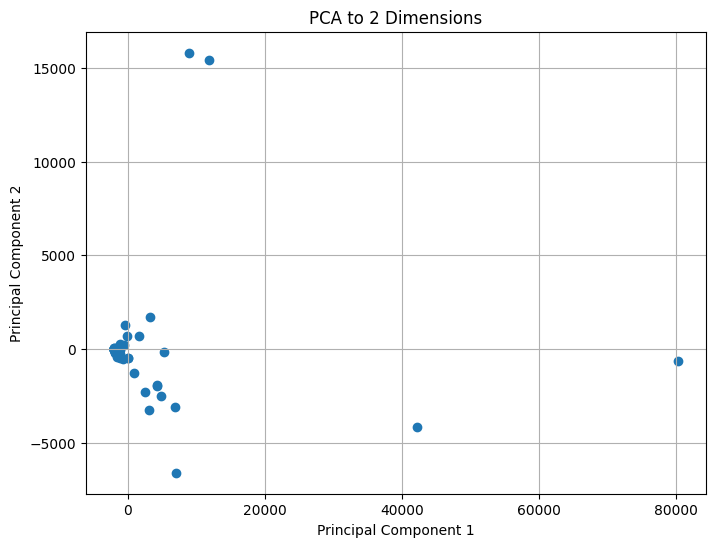

In [2]:
## Visualizing data onto 2D projection
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(data)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title('PCA to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

### Euclidean KMeans

In this example we will use the inertia scores and silhouette scores to test the fitness of clustering algorithms. The Eucliden KMeans uses as metric the euclidean distance between analogous points of the time series.

$$d_{\text{Euclidean}}(X, Y) = \sqrt{\sum_{t=1}^{T} (x_t - y_t)^2}$$

- xt​ and ytyt​ represent the values of the time series XX and YY at time tt respectively.
- T is the length of the time series, representing the number of data points
- X is the barycenter for T = t, Y is the time series

#### Size invariance
Before diving into the algorithm, lets consider the problem framing. Clustering is sensitive to spatial distance and thus its spatial aware. One way to deal with this is by transforming the data by a scaling function. The TimeSeriesScalerMeanVariance class scales the input vectors into (0, 1) - ($\mu$, $\sigma$) reducing the size effects between time series.

$$ N ~ (0, 1) - (\mu, \sigma) $$

##### Downsides

- **Loss of information**: Scaling time series will eventually lead to data degradation by stretching and compressing data.
- **Impact on seasonality and trends**: this has to do with the time horizon chosen. For long term series, the scaling will dampen the amplitude of seasonal patterns and trends. For instance, in a non stationary time series, the local properties of the series won't be the same accross the time spawn.
- **Normalization bias**: the bias introduced in giving a Gaussian distribution to a non Gaussian series

#### Time invariance
This is outside of the scope of this analysis. Which means that time series with lags may not be appropriately clustered.

Number of clusters: 2, Inertia: 18.025507790937308


Number of clusters: 3, Inertia: 16.20939704575267


Number of clusters: 4, Inertia: 14.69340761522572


Number of clusters: 5, Inertia: 13.32289660191889


Number of clusters: 6, Inertia: 12.157114638572253


Number of clusters: 7, Inertia: 11.317083596671482


Number of clusters: 8, Inertia: 10.131519887742405


Number of clusters: 9, Inertia: 9.440486386643261


Number of clusters: 10, Inertia: 8.80401100998319


Number of clusters: 11, Inertia: 8.661082655356031


Number of clusters: 12, Inertia: 7.983546865906737


Number of clusters: 13, Inertia: 7.776064177292073


Number of clusters: 14, Inertia: 7.512102440083298


Number of clusters: 15, Inertia: 7.291354480034902


Number of clusters: 16, Inertia: 6.786222137948514


Number of clusters: 17, Inertia: 6.514604472058682


Number of clusters: 18, Inertia: 6.274244360405899


Number of clusters: 19, Inertia: 6.098573625641213
Best number of clusters: 19, Min Inertia: 6.098573625641213


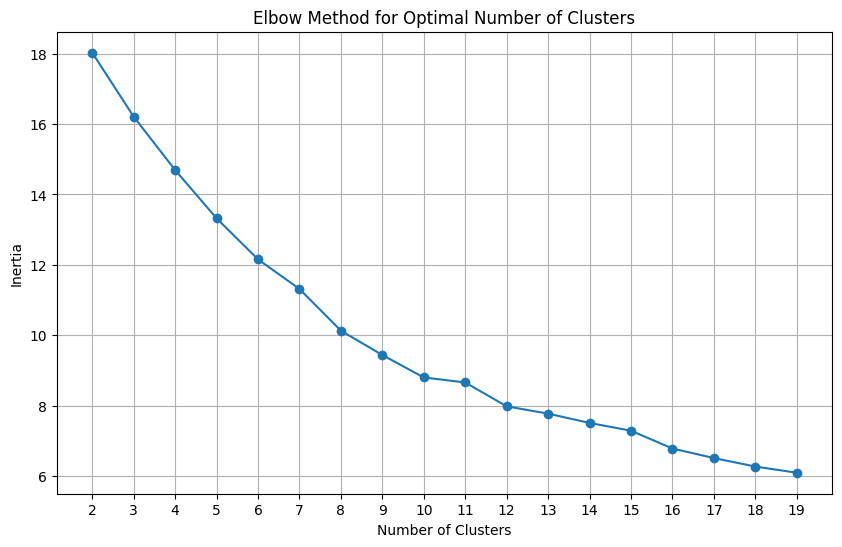

In [3]:
# Finding out the best cluster
from tslearn.clustering import silhouette_score

# size
sz = X_train.shape[1]

min_inertia = float('inf')
best_n_clusters = None
inertia_values = []
silhouette_scores = []
max_clusters = 20

# searching for the best clustering
for n_clusters in range(2, max_clusters):  # Try different numbers of clusters
    dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                              n_init=10,
                              metric="euclidean",
                              max_iter_barycenter=10,
                              verbose = 0)
    dba_km.fit(X_train)
    
    silhuette = silhouette_score(X_train, dba_km.predict(X_train), metric="euclidean")  
    inertia = dba_km.inertia_
    print(f"Number of clusters: {n_clusters}, Inertia: {inertia}")
    inertia_values.append(inertia)
    silhouette_scores.append(silhuette)
    
    if inertia < min_inertia:
        min_inertia = inertia
        best_n_clusters = n_clusters

print(f"Best number of clusters: {best_n_clusters}, Min Inertia: {min_inertia}")

n_clusters_range = range(2, max_clusters)


fig = plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(min(n_clusters_range), max(n_clusters_range)+1, 1))
plt.grid(True)

### Silhouette scores

The Silhouette scores do not appear consistent nor robust. The suggestion is to use a number of initializations param "n_init" > 10. It essentially defines the batch size and improves convergence robustness.

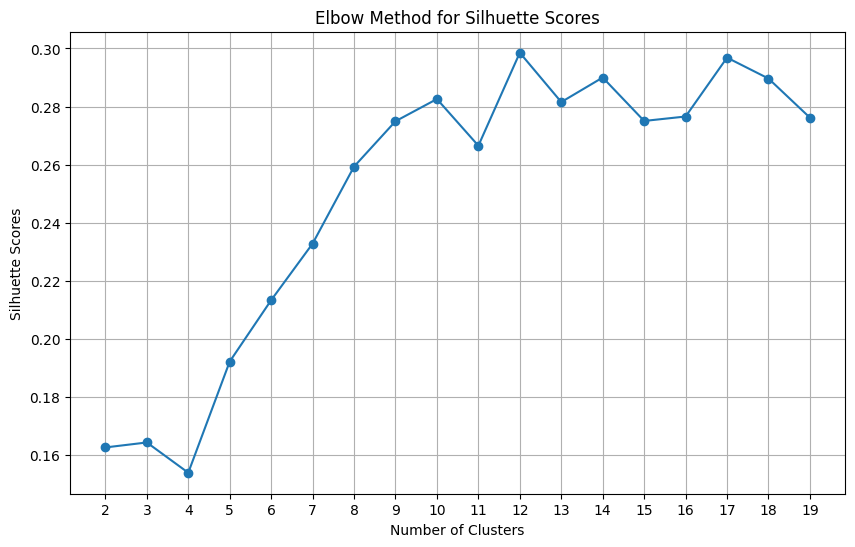

In [4]:
# Plot the elbow graph
fig = plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Elbow Method for Silhuette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhuette Scores')
plt.xticks(np.arange(min(n_clusters_range), max(n_clusters_range)+1, 1))
plt.grid(True)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_7640\2538675891.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


1.721036287103875


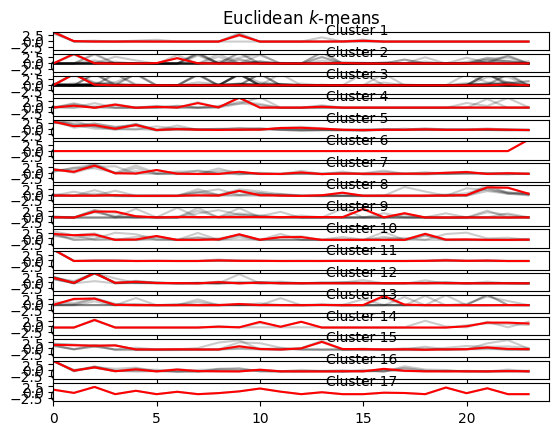

In [5]:
n_clusters = 17

dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                            n_init=2,
                            metric="dtw",
                            verbose=False,
                            max_iter_barycenter=10)
y_pred = dba_km.fit_predict(X_train)


for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, yi + 1)  # Changed subplot dimensions to avoid overlapping
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 0:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
print(dba_km.inertia_)

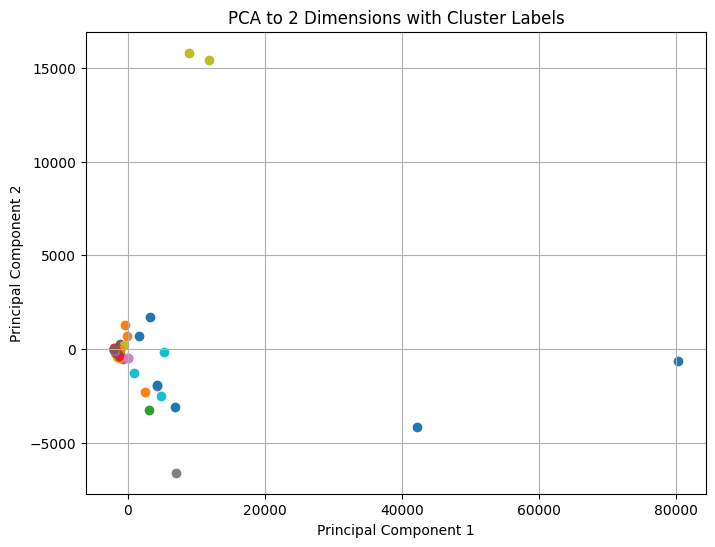

In [6]:
data_with_labels = pd.concat([data, pd.Series(y_pred, index=data.index, name='cluster_label')], axis=1)
data_with_labels["cluster_label"]

pca = PCA(n_components=2)
X_2d = pca.fit_transform(data)

# Assign cluster labels to the transformed data
data_with_labels = pd.concat([pd.DataFrame(X_2d, index=data.index, columns=['PC1', 'PC2']), 
                              pd.Series(y_pred, index=data.index, name='cluster_label')],
                              axis=1)

# Plot the transformed data with colors based on cluster labels
plt.figure(figsize=(8, 6))
for cluster_label in data_with_labels['cluster_label'].unique():
    plt.scatter(data_with_labels.loc[data_with_labels['cluster_label'] == cluster_label, 'PC1'],
                data_with_labels.loc[data_with_labels['cluster_label'] == cluster_label, 'PC2'],
                label=f'Cluster {cluster_label}')
plt.title('PCA to 2 Dimensions with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

## Dynamic Time Warping

In [7]:
min_inertia = float('inf')
best_n_clusters = None
inertia_values = []
silhouette_scores = []
max_clusters = 20

# searching for the best clustering
for n_clusters in range(2, max_clusters):  # Try different numbers of clusters
    dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                              n_init=10,
                              metric="dtw",
                              max_iter_barycenter=10,
                              verbose = 0)
    dba_km.fit(X_train)
    
    silhuette = silhouette_score(X_train, dba_km.predict(X_train), metric="dtw")  
    inertia = dba_km.inertia_
    print(f"Number of clusters: {n_clusters}, Inertia: {inertia}")
    inertia_values.append(inertia)
    silhouette_scores.append(silhuette)
    
    if inertia < min_inertia:
        min_inertia = inertia
        best_n_clusters = n_clusters

print(f"Best number of clusters: {best_n_clusters}, Min Inertia: {min_inertia}")

n_clusters_range = range(2, max_clusters)


fig = plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(min(n_clusters_range), max(n_clusters_range)+1, 1))
plt.grid(True)

Number of clusters: 2, Inertia: 5.476554252596709


Number of clusters: 3, Inertia: 4.200862723703858


Number of clusters: 4, Inertia: 3.591363572152028


KeyboardInterrupt: 

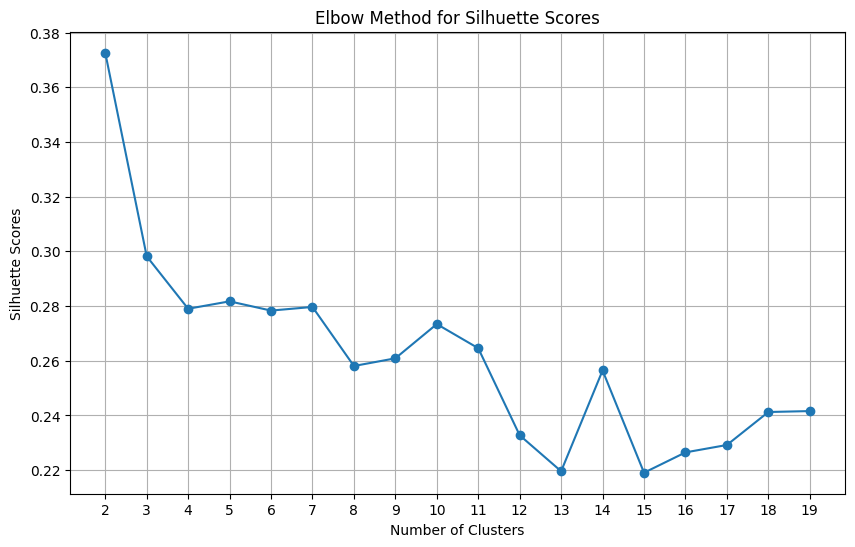

In [ ]:
# Plot the elbow graph
fig = plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Elbow Method for Silhuette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhuette Scores')
plt.xticks(np.arange(min(n_clusters_range), max(n_clusters_range)+1, 1))
plt.grid(True)

### Soft DTW

In [ ]:
min_inertia = float('inf')
best_n_clusters = None
inertia_values = []
silhouette_scores = []
max_clusters = 20

# searching for the best clustering
for n_clusters in range(2, max_clusters):  # Try different numbers of clusters
    dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                              n_init=10,
                              metric="softdtw",
                              max_iter_barycenter=10,
                              verbose = 0)
    dba_km.fit(X_train)
    
    silhuette = silhouette_score(X_train, dba_km.predict(X_train), metric="dtw")  
    inertia = dba_km.inertia_
    print(f"Number of clusters: {n_clusters}, Inertia: {inertia}")
    inertia_values.append(inertia)
    silhouette_scores.append(silhuette)
    
    if inertia < min_inertia:
        min_inertia = inertia
        best_n_clusters = n_clusters

print(f"Best number of clusters: {best_n_clusters}, Min Inertia: {min_inertia}")

n_clusters_range = range(2, max_clusters)


fig = plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(min(n_clusters_range), max(n_clusters_range)+1, 1))
plt.grid(True)

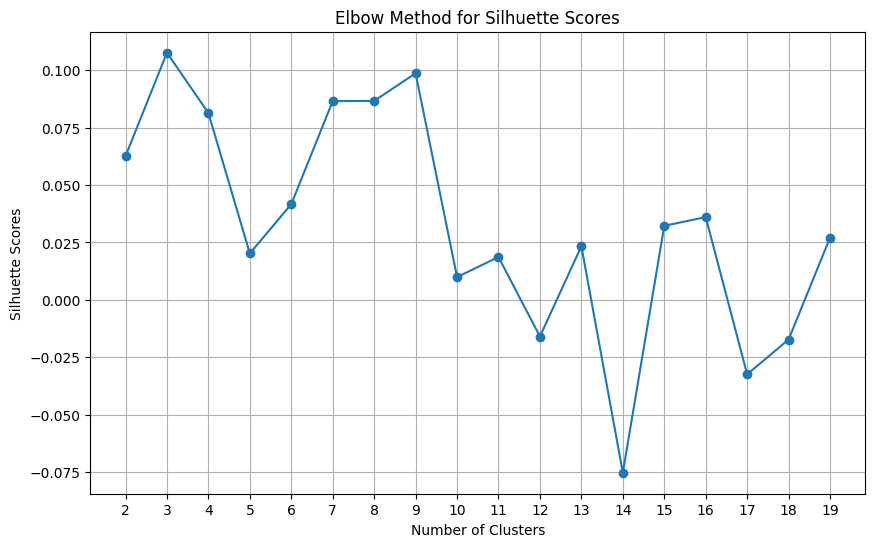

In [ ]:
# Plot the elbow graph
fig = plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Elbow Method for Silhuette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhuette Scores')
plt.xticks(np.arange(min(n_clusters_range), max(n_clusters_range)+1, 1))
plt.grid(True)